<a href="https://colab.research.google.com/github/Adhiperumbar/ML/blob/main/housingprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#STEP 1: LOAD AND VIEW DATASETS
from google.colab import files
import pandas as pd
uploaded = files.upload()

df = pd.read_csv("AmesHousing.csv")
df.head()


Saving AmesHousing.csv to AmesHousing (1).csv


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [12]:
#STEP 2: DATA PREPROCESSING
# Drop columns with >50% missing values
df = df.loc[:, df.isnull().mean() < 0.5].copy()

# Separate numerical and categorical
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill missing values
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categoricals only if they exist
if len(cat_cols) > 0:
    df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# One-hot encode categoricals
df = pd.get_dummies(df, drop_first=True)

# Drop rows with target column missing
df = df.dropna(subset=['SalePrice'])


In [15]:
#STEP 3: TRAIN/TEST SPLIT AND SCALING:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [16]:
#STEP 4: LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)

lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)

print("Linear Regression:")
print("RMSE:", lr_rmse)
print("R² Score:", lr_r2)


Linear Regression:
RMSE: 29220.746706988743
R² Score: 0.8935020974651886


In [17]:
#STEP 5 :RANDOM FOREST REGRESSOR:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest:")
print("RMSE:", rf_rmse)
print("R² Score:", rf_r2)


Random Forest:
RMSE: 26648.177181616797
R² Score: 0.9114286121863645


In [18]:
#STEP 6: XGBOOST REGRESSOR:
from xgboost import XGBRegressor
import numpy as np
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)

xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_r2 = r2_score(y_test, xgb_pred)

print("XGBoost:")
print("RMSE:", xgb_rmse)
print("R² Score:", xgb_r2)


XGBoost:
RMSE: 24192.041005256255
R² Score: 0.9270032644271851


In [19]:
#STEP 7: MODEL COMPARISION TABLE:
results = {
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "RMSE": [lr_rmse, rf_rmse, xgb_rmse],
    "R² Score": [lr_r2, rf_r2, xgb_r2]
}

pd.DataFrame(results)


,Model,RMSE,R² Score
0,Linear Regression,29220.746707,0.893502
1,Random Forest,26648.177182,0.911429
2,XGBoost,24192.041005,0.927003


from matplotlib import pyplot as plt
_df_0['RMSE'].plot(kind='hist', bins=20, title='RMSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['R² Score'].plot(kind='hist', bins=20, title='R² Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='RMSE', y='R² Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['R² Score']
  ys = series['RMSE']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('R² Score', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('R² Score')
_ = plt.ylabel('RMSE')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['R² Score']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'R² Score'}, axis=1)
              .sort_values('R² Score', ascending=True))
  xs = counted['R² Score']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('R² Score', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('R² Score')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['RMSE'].plot(kind='line', figsize=(8, 4), title='RMSE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['R² Score'].plot(kind='line', figsize=(8, 4), title='R² Score')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='RMSE', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='R² Score', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

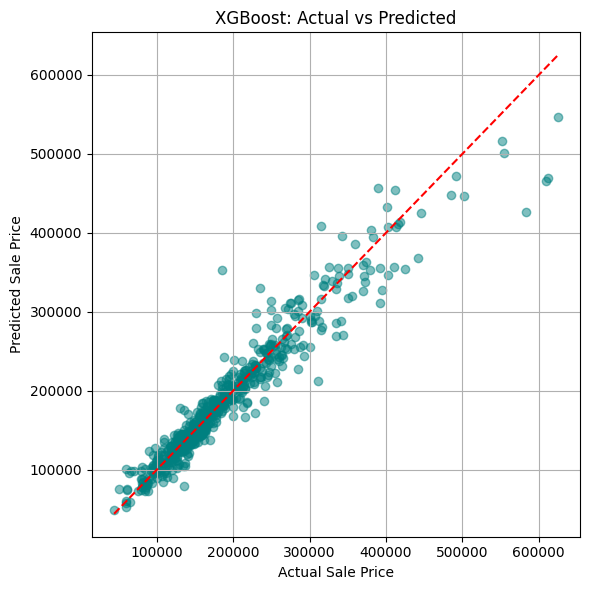

In [20]:
#STEP 8: XGBOOST PRED V/S ACTUAL PLOT:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(6,6))
plt.scatter(y_test, xgb_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("XGBoost: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()


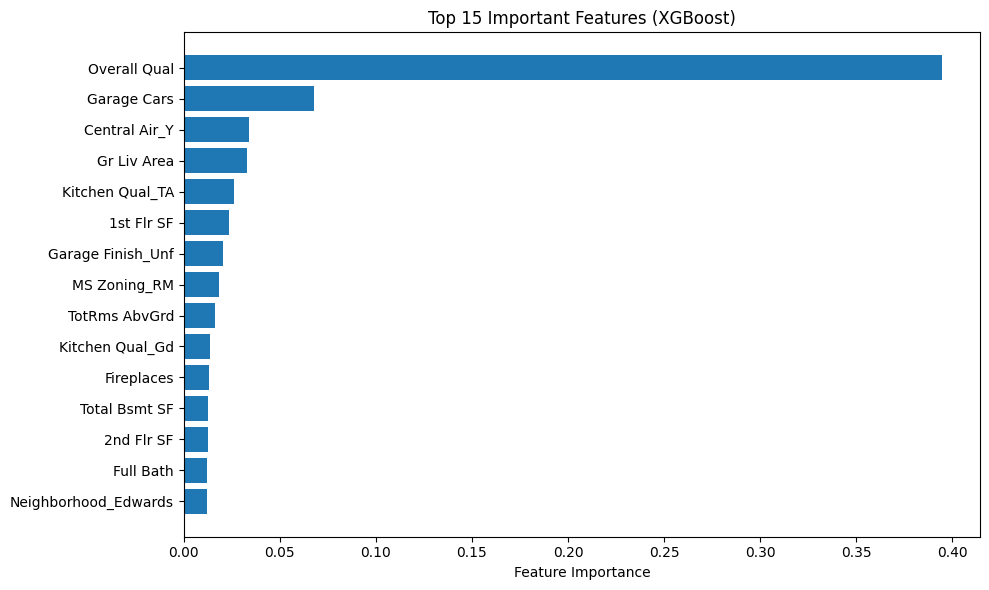

In [21]:
#STEP 9: XGBOOST IMPORTANT FEATURES PLOT:
import matplotlib.pyplot as plt
import numpy as np
xgb_importance = xgb_model.feature_importances_
sorted_idx = xgb_importance.argsort()[-15:]

plt.figure(figsize=(10, 6))
plt.barh(np.array(X.columns)[sorted_idx], xgb_importance[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Top 15 Important Features (XGBoost)")
plt.tight_layout()
plt.show()


In [22]:
#STEP 10:  SAVING THE MODEL:
import joblib
joblib.dump(xgb_model, 'xgb_model.pkl')


['xgb_model.pkl']